In [19]:
import numpy as np
import pandas as pd
import matplotlib

%matplotlib inline

In [40]:
# O que os parâmetros alpha e beta estão fazendo aqui?

s = pd.Series(np.random.beta(1, 10, size=10000))

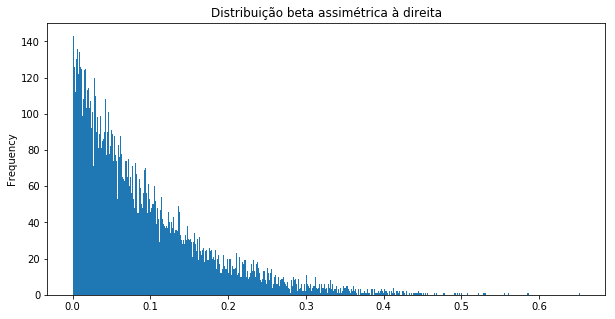

In [65]:
# Bins se refere a quantidade de classes que serão criadas para plotar o histograma. 
# Quanto maior o número, mais detalhado o histograma é, e menor o valor do eixo y, 
# pois a frequencia de cada bin irá diminuir, pois você sabe melhor os números que ali tem. 

# O que o normed significa aqui? Você pensava que antes ele fazia com que o eixo y fosse até 1. Mas não é isso.
# Eu acho que significa mais deixar a média igual a 0... Mas vejo mudanças no eixo y, não x...

s.plot(bins=500, kind='hist', title='Distribuição beta assimétrica à direita', figsize=(10,5))

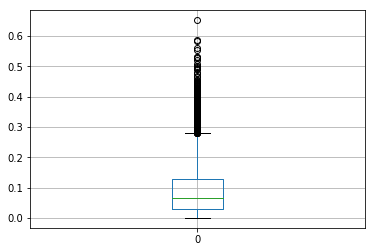

In [47]:
# Esqueci a fórmula dos bigodes do boxplot! mas não é o valor máximo ;)
pd.DataFrame(s).boxplot()

## Objetivo: Deixar distriuição mais `normalzinha`, rs
Utilzar métodos apresentados no livro "Estatística Básica" do Bussab&Morettin, e comparar qual foi o melhor método através de um _box plot_.
Além disso, tentar responder a seguinte dúvida: **O que estamos perdendo de informação quando estamos realizando essa operação de normalização?**

Por quê? Temos muitos outliers, a distribuição obtida acima é aparentemente assimétrica à direita.

Vamos escolher os seguintes valores para p: 
```
p=0, p=1/4, p=1/2 e p=1/3
```

In [53]:
df = pd.DataFrame(s)
df.columns = ['beta_dist']

In [55]:
import math

In [61]:
df['p_0'] = df.beta_dist.map(lambda x: math.log(x))
df['p_1_4'] = df.beta_dist.map(lambda x: x**0.25)
df['p_1_2'] = df.beta_dist.map(lambda x: x**0.50)
df['p_1_3'] = df.beta_dist.map(lambda x: x**0.333)

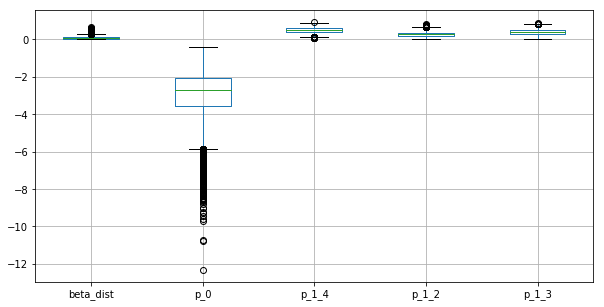

In [64]:
df.boxplot(figsize=(10,5))

In [67]:
df.describe()

,beta_dist,p_0,p_1_4,p_1_2,p_1_3
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,0.090958,-2.933809,0.501638,0.270078,0.405648
std,0.083451,1.251604,0.135788,0.134232,0.141467
min,0.000005,-12.306380,0.046116,0.002127,0.016605
25%,0.028267,-3.566055,0.410035,0.168128,0.304984
50%,0.067098,-2.701594,0.508954,0.259034,0.406720
75%,0.129454,-2.044432,0.599831,0.359797,0.506214
max,0.652376,-0.427134,0.898720,0.807698,0.867417


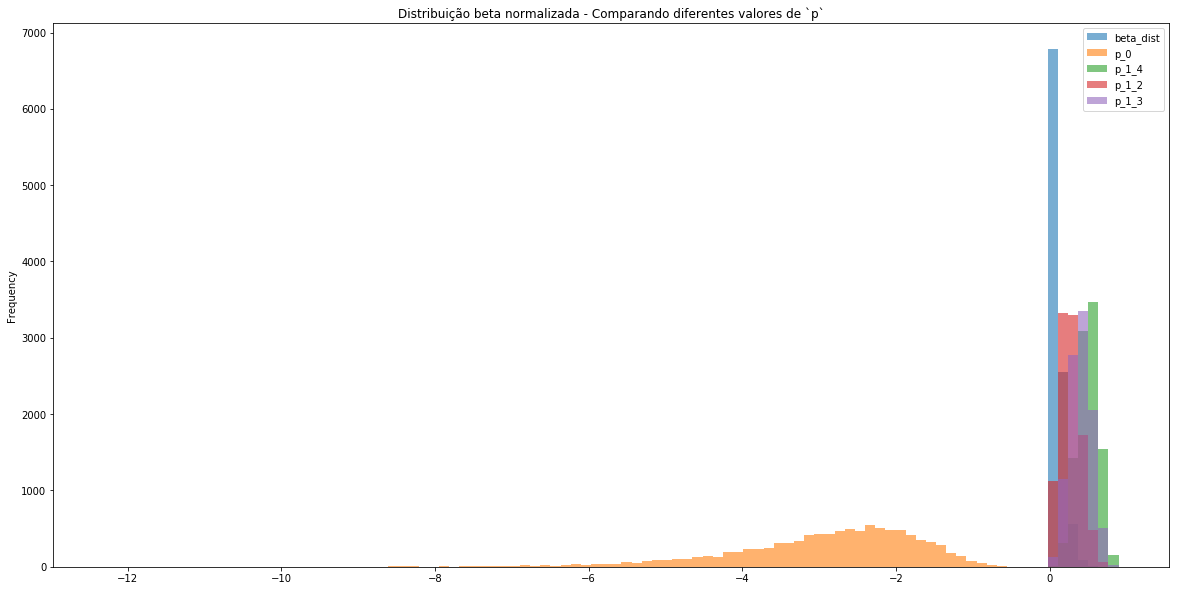

In [78]:
df.plot(kind='hist', alpha=0.6, bins=100, figsize=(20,10),
        title='Distribuição beta normalizada - Comparando diferentes valores de `p`')

In [88]:
df_beta_dist_median = df.beta_dist.median()
df_u = df[df.beta_dist < df_beta_dist_median][['beta_dist']].copy()
df_v = df[df.beta_dist > df_beta_dist_median][['beta_dist']].copy()

# Teria que inverter o index?

In [89]:
df_u['u_distance'] = df_u.beta_dist.map(lambda x: abs(x-df_beta_dist_median))
df_v['v_distance'] = df_v.beta_dist.map(lambda x: abs(x-df_beta_dist_median))

In [91]:
df_distance = pd.concat([df_u, df_v], axis=0)
df_distance

,beta_dist,u_distance,v_distance
0,0.033045,0.034053,NaN
1,0.051841,0.015257,NaN
2,0.012175,0.054924,NaN
3,0.022248,0.044850,NaN
4,0.028738,0.038360,NaN
5,0.039587,0.027512,NaN
6,0.024531,0.042567,NaN
13,0.012629,0.054469,NaN
14,0.001652,0.065447,NaN
16,0.058731,0.008368,NaN


## Conclusão (parcial)

Olhando as médias obtidas e os gráficos, é possível ver que ainda temos outliers, mas aparentemente o valor de `p=0` traz uma distribuição mais simétrica.